In [1]:
import os, sys, numpy, pandas
sys.path.append( os.path.dirname( os.getcwd( ) ) )
from engine import core
from engine.viz import display_msa
%matplotlib inline

This notebook tests whether the Metropolitan Statistical Area (MSA) makes sense. Here, you just plop out which MSA to visualize, say "chicago" or "nyc". It will spit out a figure showing the counties, with FIPS numbers, for that metro region.

Looks like I have all the counties defined for the NYC Metro Area. After git commit [#fd664d](https://github.com/tanimislam/covid19_stats/commit/fd664daaec025943e4b550c981ae3ea3aace6a28), New York City is a county in the "nyc" metro area with FIPS # "00001".

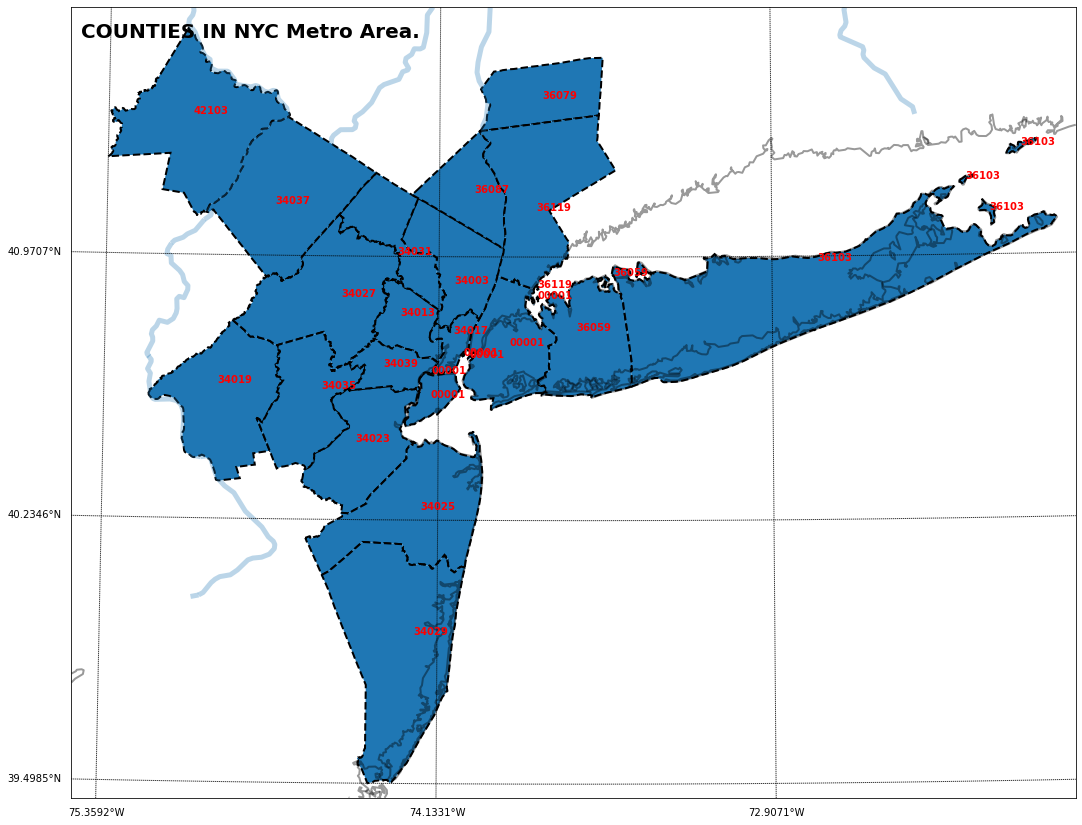

In [2]:
display_msa( 'nyc', doShow=True )